In [4]:
import pandas as pd

file_path = "ChatGPT_Mixed_Itais.xlsx"
df = pd.read_excel(file_path)

df

,AgeRange,Gender,Nationatily,adj1,adj2,adj3,Vikings_Question,Reason,Error_Question,Satisfaction,ChatGPT_Gender
0,25-34,Woman,Italian,helpful,smart,unbelievable,I am writing an essay about the history of Vik...,It has to understand the context but without t...,convert meters to kilometers,9.0,Male
1,18-24,Woman,Italian,smart,fast,useful,Can you write a detailed text about the histor...,Asking questions to Chat GPT to better underst...,You provided an incorrect answer to my math pr...,9.0,Genderless
2,25-34,Woman,German,helpful,life changing,innovative,You have the role of an historic expert.\nPlea...,Because the role is very important to get the ...,There seems to be a mistake in not converting ...,8.0,Female
3,25-34,Woman,Mexican,unpredictable,useless,exhaustive,I want you to be an expert in history. I need ...,So ChatGPT knows what its knowledge background...,There’s a mistake in the problem. You have to ...,5.0,Genderless
4,25-34,Woman,Romanian,comprehensive,fast,malleable,Write an introduction for an essay on the hist...,Beacause the previous question didn’t provide ...,Convert the answer to km.,8.0,Genderless
...,...,...,...,...,...,...,...,...,...,...,...
467,18-24,Man,Icelandic,efficient,convenient,helpful,"Hi, I am working on an essay on the history of...","I like to humanize ChatGPT, it makes the conve...",I see you have written the answer in meters. C...,8.0,Female
468,55+,Woman,Icelandic,timesaving,useful,NaN,Write an intro for an essay on the history of ...,It’s simple and a good start to see what Chat ...,I would probably correct Chat by saying what i...,8.0,Genderless
469,25-34,Man,Belgian,handy,versatile,lazy,"Hi, I’m writing an essay on the history of Vik...",I want to give as much context as possible to ...,I think you may have made a mistake here by no...,7.0,Genderless
470,18-24,Woman,Icelandic,helpful,smart,best,I would like to write a essay about history of...,why not,this is not correct answer,7.0,Genderless


In [5]:
df['AgeRange'].value_counts()

AgeRange
18-24    235
25-34    160
35-44     53
45-54     15
55+        9
Name: count, dtype: int64

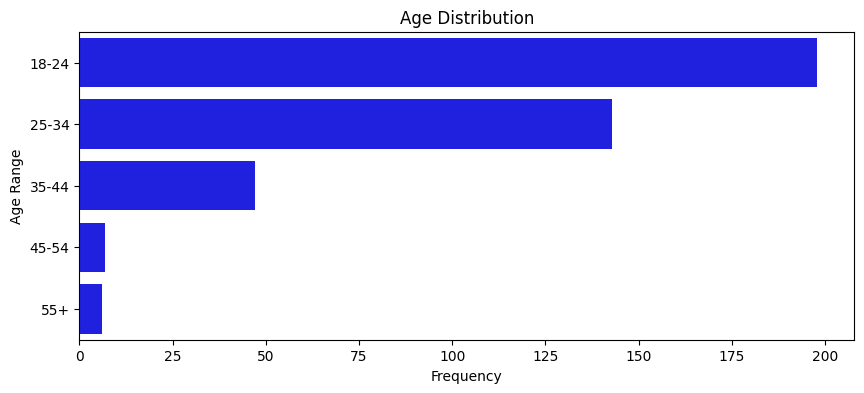

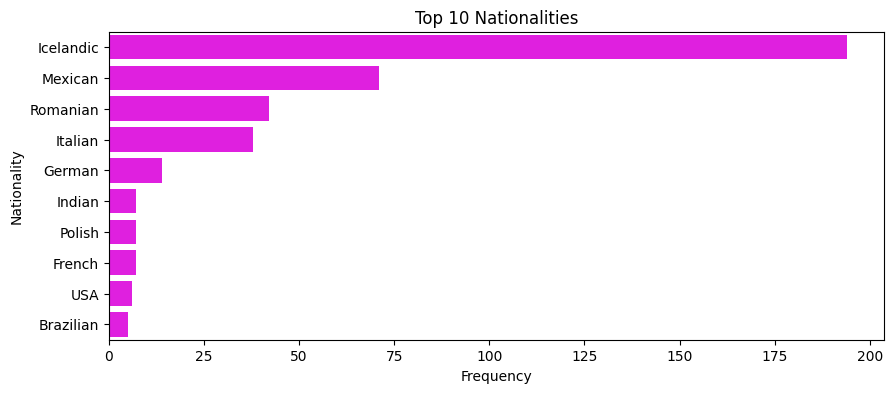

Chi-square p-value (Age vs AI Gender): 0.2683
Chi-square p-value (Nationality vs AI Gender): 0.6988
Chi-square p-value (Gender vs AI Gender): 0.1233


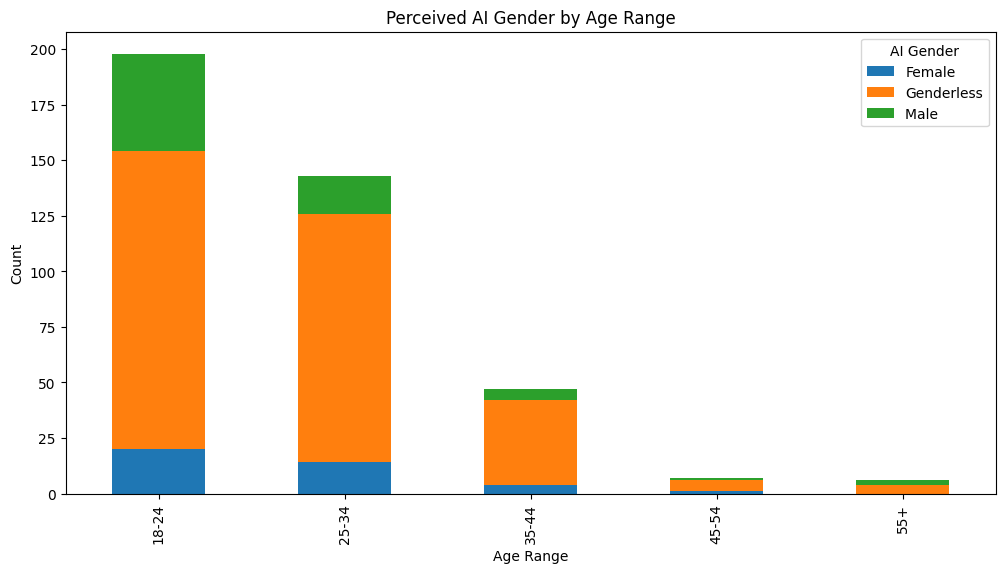

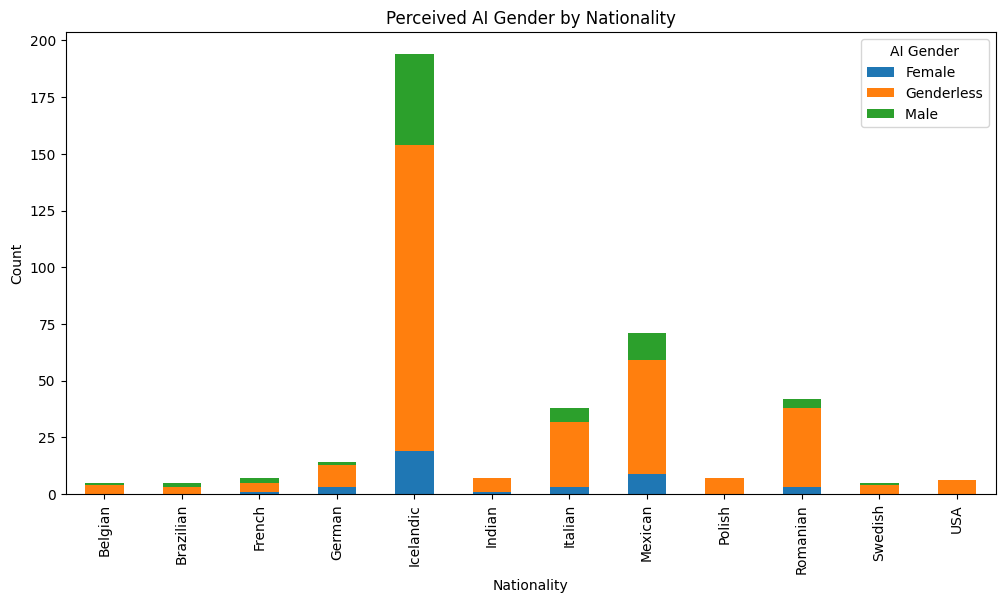

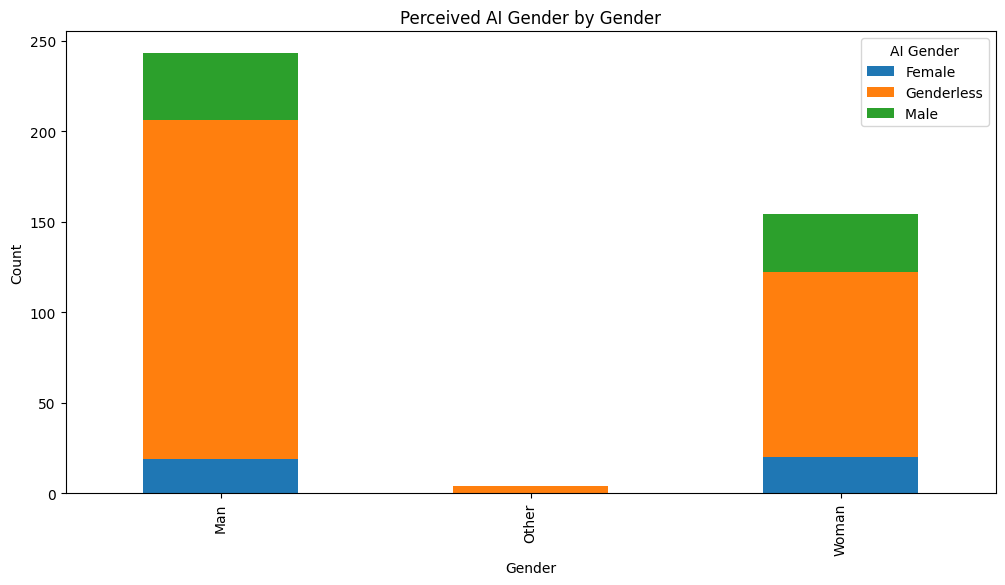

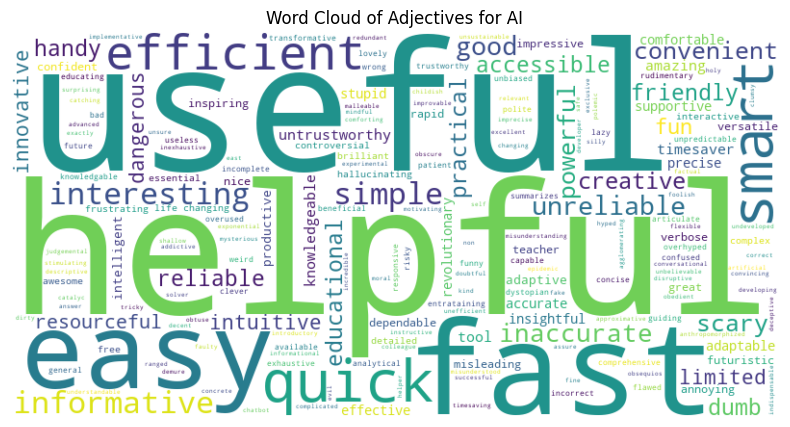

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_excel('ChatGPT_Mixed_Itais.xlsx')

# Data cleaning (handling missing data)
df_clean = df.dropna(subset=['AgeRange', 'ChatGPT_Gender', 'adj1', 'adj2', 'adj3', 'Reason'])

# Demographic Analysis
age_counts = df_clean['AgeRange'].value_counts()
nationality_counts = df_clean['Nationatily'].value_counts().head(10)

# Visualization - Demographics
plt.figure(figsize=(10,4))
sns.barplot(x=age_counts.values, y=age_counts.index, color ="blue")
plt.title('Age Distribution')
plt.xlabel('Frequency')
plt.ylabel('Age Range')
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x=nationality_counts.values, y=nationality_counts.index, color = "magenta")
plt.title('Top 10 Nationalities')
plt.xlabel('Frequency')
plt.ylabel('Nationality')
plt.show()

# Perceived AI Gender Analysis - Chi-square Test
contingency = pd.crosstab(df_clean['AgeRange'], df_clean['ChatGPT_Gender'])
chi2, p_value, _, _ = chi2_contingency(contingency)
print(f"Chi-square p-value (Age vs AI Gender): {p_value:.4f}")
# Perceived AI Gender Analysis - Chi-square Test
contingency1 = pd.crosstab(df_clean['Nationatily'], df_clean['ChatGPT_Gender'])
chi2, p_value, _, _ = chi2_contingency(contingency1)
print(f"Chi-square p-value (Nationality vs AI Gender): {p_value:.4f}")
# Perceived AI Gender Analysis - Chi-square Test
contingency2 = pd.crosstab(df_clean['Gender'], df_clean['ChatGPT_Gender'])
chi2, p_value, _, _ = chi2_contingency(contingency2)
print(f"Chi-square p-value (Gender vs AI Gender): {p_value:.4f}")

# Visualization - AI Gender perception by Age Range
contingency.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Perceived AI Gender by Age Range')
plt.ylabel('Count')
plt.xlabel('Age Range')
plt.legend(title='AI Gender')
plt.show()
# Visualization - AI Gender perception by Nationality
contingency1.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Perceived AI Gender by Nationality')
plt.ylabel('Count')
plt.xlabel('Nationality')
plt.legend(title='AI Gender')
plt.show()
# Visualization - AI Gender perception by Gender
contingency2.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Perceived AI Gender by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(title='AI Gender')
plt.show()

# Adjective Frequency Analysis
adjectives_text = ' '.join(df_clean[['adj1', 'adj2', 'adj3']].fillna('').agg(' '.join, axis=1))
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(adjectives_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Adjectives for AI')
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\camillac\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\camillac\AppData\Local\Temp\ipykernel_4756\186833812.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Nationatily'] = df_clean['Nationatily'].str.strip().str.title()
C:\Users\camillac\AppData\Local\Temp\ipykernel_4756\186833812.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Adj_combined'] = df_clean[[

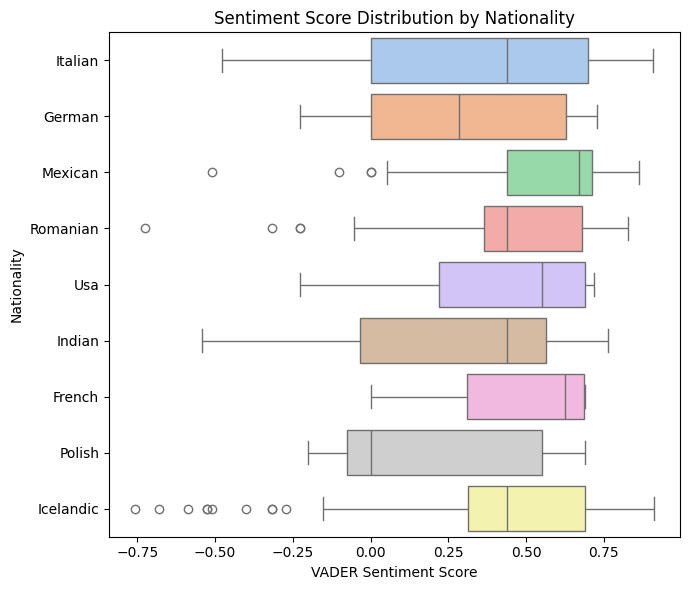

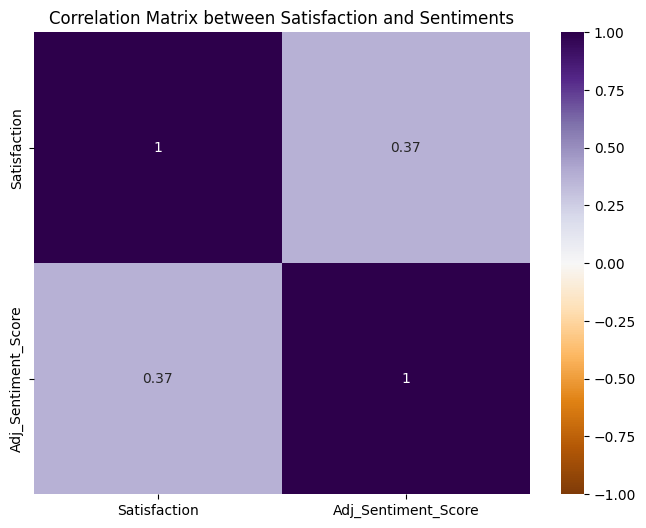

                     Satisfaction  Adj_Sentiment_Score
Satisfaction             1.000000             0.368665
Adj_Sentiment_Score      0.368665             1.000000


In [7]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download lexicon (run once locally)
nltk.download('vader_lexicon')

# Load the dataset
df = pd.read_excel('ChatGPT_Mixed_Itais.xlsx')

# Data preparation
df_clean = df.dropna(subset=['adj1', 'adj2', 'adj3', 'Satisfaction'])

# Normalize nationality
df_clean['Nationatily'] = df_clean['Nationatily'].str.strip().str.title()

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sentiment analysis for combined adjectives
df_clean['Adj_combined'] = df_clean[['adj1', 'adj2', 'adj3']].agg(' '.join, axis=1)
df_clean['Adj_Sentiment_Score'] = df_clean['Adj_combined'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Filter: Only nationalities with more than 5 responses
valid_nations = df_clean['Nationatily'].value_counts()
valid_nations = valid_nations[valid_nations > 5].index
df_filtered = df_clean[df_clean['Nationatily'].isin(valid_nations)]

# Plot: Boxplot showing median sentiment per nationality
plt.figure(figsize=(7, 6))
sns.boxplot(data=df_filtered, x='Adj_Sentiment_Score', y='Nationatily', palette='pastel')
plt.title('Sentiment Score Distribution by Nationality')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()

# Correlation Analysis
correlation = df_clean[['Satisfaction', 'Adj_Sentiment_Score']].corr()

# Visualization of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='PuOr', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Satisfaction and Sentiments')
plt.show()

# Print correlation results
print(correlation)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\camillac\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\camillac\AppData\Local\Temp\ipykernel_4756\4227317416.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Nationatily'] = df_clean['Nationatily'].str.strip().str.title()
C:\Users\camillac\AppData\Local\Temp\ipykernel_4756\4227317416.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Gender'] = df_clean['Gend

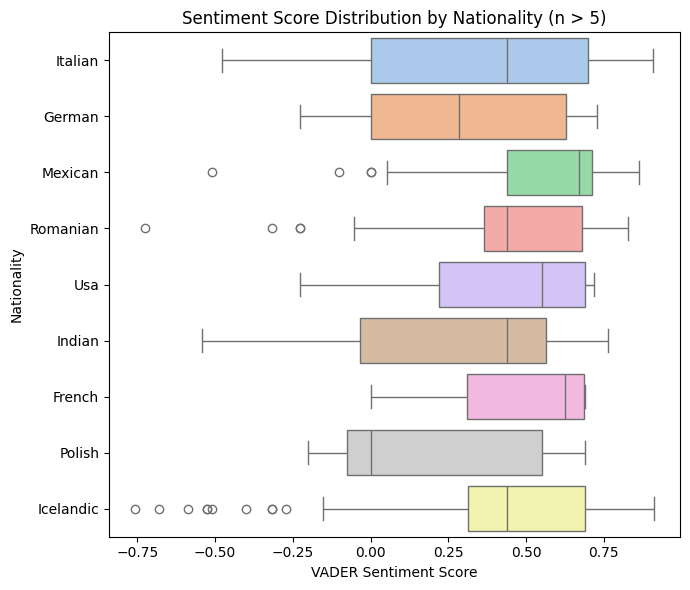

C:\Users\camillac\AppData\Local\Temp\ipykernel_4756\4227317416.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Adj_Sentiment_Score', y='AgeRange', palette='light:#5A9')


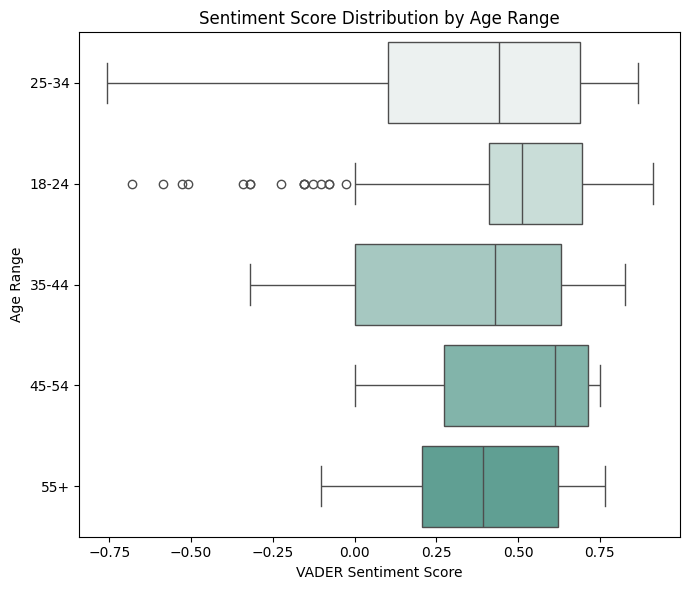

C:\Users\camillac\AppData\Local\Temp\ipykernel_4756\4227317416.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Adj_Sentiment_Score', y='Gender', palette='light:#E49')


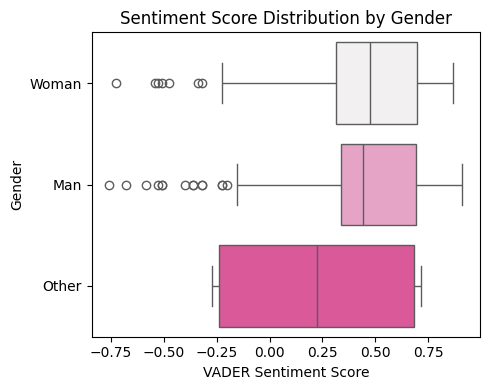

In [8]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download lexicon (run once locally)
nltk.download('vader_lexicon')

# Load the dataset
df = pd.read_excel('ChatGPT_Mixed_Itais.xlsx')

# Data preparation
df_clean = df.dropna(subset=['adj1', 'adj2', 'adj3', 'Satisfaction'])

# Normalize values
df_clean['Nationatily'] = df_clean['Nationatily'].str.strip().str.title()
df_clean['Gender'] = df_clean['Gender'].str.strip().str.title()
df_clean['AgeRange'] = df_clean['AgeRange'].str.strip()

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sentiment analysis
df_clean['Adj_combined'] = df_clean[['adj1', 'adj2', 'adj3']].agg(' '.join, axis=1)
df_clean['Adj_Sentiment_Score'] = df_clean['Adj_combined'].apply(lambda x: sia.polarity_scores(x)['compound'])

# === PLOT 1: Sentiment by Nationality (only if >5 participants) ===
valid_nats = df_clean['Nationatily'].value_counts()
valid_nats = valid_nats[valid_nats > 5].index
df_nats = df_clean[df_clean['Nationatily'].isin(valid_nats)]

plt.figure(figsize=(7, 6))
sns.boxplot(data=df_nats, x='Adj_Sentiment_Score', y='Nationatily', palette='pastel')
plt.title('Sentiment Score Distribution by Nationality (n > 5)')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()

# === PLOT 2: Sentiment by Age Range ===
plt.figure(figsize=(7, 6))
sns.boxplot(data=df_clean, x='Adj_Sentiment_Score', y='AgeRange', palette='light:#5A9')
plt.title('Sentiment Score Distribution by Age Range')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Age Range')
plt.tight_layout()
plt.show()

# === PLOT 3: Sentiment by Gender ===
plt.figure(figsize=(5, 4))
sns.boxplot(data=df_clean, x='Adj_Sentiment_Score', y='Gender', palette='light:#E49')
plt.title('Sentiment Score Distribution by Gender')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()


In [9]:
from scipy.stats import f_oneway

# Group sentiment scores by gender
groups = df_clean.groupby('Gender')['Adj_Sentiment_Score'].apply(list)

# Run one-way ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA p-value (Gender vs Sentiment Score): {p_value:.4f}")

# By AgeRange (ANOVA)
age_groups = [group['Adj_Sentiment_Score'].dropna() for name, group in df_clean.groupby('AgeRange')]
f_stat, p_age = f_oneway(*age_groups)
print(f"ANOVA p-value (Age Range vs Sentiment): {p_age:.4f}")

# Group by nationality and run ANOVA
nat_groups = df_clean.groupby('Nationatily')['Adj_Sentiment_Score'].apply(list)
f_s, p_v = f_oneway(*nat_groups)
print(f"ANOVA p-value (Nationality vs Sentiment Score): {p_v:.4f}")

ANOVA p-value (Gender vs Sentiment Score): 0.3081
ANOVA p-value (Age Range vs Sentiment): 0.0350
ANOVA p-value (Nationality vs Sentiment Score): 0.0514


----------------------

C:\Users\camillac\AppData\Local\Temp\ipykernel_4756\3785951064.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_class.head(10), y=importance_class.head(10).index, ax=axes[0], palette='flare')
C:\Users\camillac\AppData\Local\Temp\ipykernel_4756\3785951064.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_reg.head(10), y=importance_reg.head(10).index, ax=axes[1], palette='coolwarm')


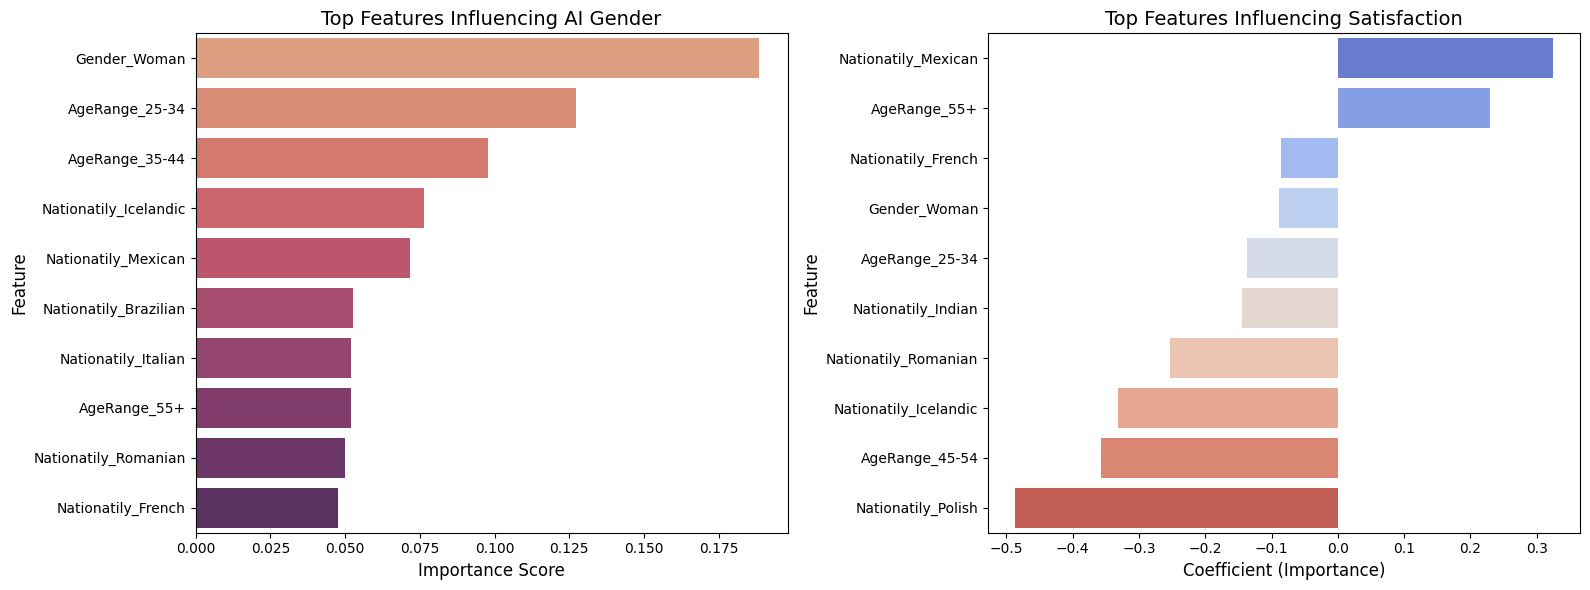

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_excel('ChatGPT_Mixed_Itais.xlsx')
df_clean = df.dropna(subset=['AgeRange', 'Gender', 'Nationatily', 'adj1', 'adj2', 'adj3', 'Reason', 'Satisfaction', 'ChatGPT_Gender'])

# Encoding
X = pd.get_dummies(df_clean[['AgeRange', 'Gender', 'Nationatily']], drop_first=True)
y_satisfaction = df_clean['Satisfaction']

# Regression for Satisfaction
lin_reg = LinearRegression().fit(X, y_satisfaction)
importance_reg = pd.Series(lin_reg.coef_, index=X.columns).sort_values(ascending=False)

# Classification (AI Gender)
label_enc = LabelEncoder()
y_gender = label_enc.fit_transform(df_clean['ChatGPT_Gender'])
rf = RandomForestClassifier(random_state=42).fit(X, y_gender)
importance_class = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualize Feature Importance with gradient colors
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gradient colors
sns.barplot(x=importance_class.head(10), y=importance_class.head(10).index, ax=axes[0], palette='flare')
axes[0].set_title('Top Features Influencing AI Gender', fontsize=14)
axes[0].set_xlabel('Importance Score', fontsize=12)
axes[0].set_ylabel('Feature', fontsize=12)

sns.barplot(x=importance_reg.head(10), y=importance_reg.head(10).index, ax=axes[1], palette='coolwarm')
axes[1].set_title('Top Features Influencing Satisfaction', fontsize=14)
axes[1].set_xlabel('Coefficient (Importance)', fontsize=12)
axes[1].set_ylabel('Feature', fontsize=12)

plt.tight_layout()
plt.show()